## Especialização em Inteligência Artificial – IFMG
## Análise de Séries Temporais - Continuação Lista de exercícios 4
**Aluno**: Alexandre Fortes Santana  

**Professor**: Carlos Severiano

[Este Notebook: https://github.com/alexandrefortes/series-temporais/blob/main/Lista%204/Lista%20de%20Exercicios%2004-3.ipynb](https://github.com/alexandrefortes/series-temporais/blob/main/Lista%204/Lista%20de%20Exercicios%2004-3.ipynb) 

[Notebook anterior: https://github.com/alexandrefortes/series-temporais/blob/main/Lista%204/Lista%20de%20Exercicios%2004.ipynb](https://github.com/alexandrefortes/series-temporais/blob/main/Lista%204/Lista%20de%20Exercicios%2004-3.ipynb)

3. Aplique o modelo de Redes Neurais às mesmas bases de dados usadas na atividade anterior (Lista de Exercícios 3), realizando os mesmos experimentos citados nessa atividade. Em seguida, compare os resultados com o melhor modelo observado no experimento anterior. Discuta se houve um ganho na aplicação de um modelo de Aprendizado de Máquina ao problema de previsão de séries temporais. Avalie também se foram observadas dificuldades em alguns casos.  

Exercício Original:  

1. Escolher 3 modelos, cada um pertencente a um dos grupos abaixo:  
A. Um modelo simples  
B. Um modelo de suavização exponencial  
C. Um modelo ARIMA  

2. Separar a base de dados em treinamento e teste, na proporção 80% para 20%.

3. Aplicar cada método de previsão aos dados, usando validação cruzada.

4. Medir o desempenho de cada modelo a partir de 3 métricas:  
- MAE  
- RMSE  
- SMAPE  

5. Ilustrar em um gráfico o desempenho do método que se saiu melhor nos experimentos de cada base de dados.

## Base 1: facebook-historical-stock-price.csv

In [2]:
import pandas as pd

# carregando a base
file_path = 'facebook-historical-stock-price.csv'
fb_data = pd.read_csv(file_path)
fb_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [3]:
from sklearn.model_selection import train_test_split

# 'Date' para datetime e setando como index
fb_data['Date'] = pd.to_datetime(fb_data['Date'])
fb_data.set_index('Date', inplace=True)

# 'Adj Close' para forecasting
time_series = fb_data['Adj Close']

# 80% treinamento, 20% teste
train_data, test_data = train_test_split(time_series, test_size=0.2, shuffle=False)
len(train_data), len(test_data)

(1741, 436)

In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Função para calcular SMAPE
def smape(y_true, y_pred):
    denominador = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diferenca = np.abs(y_true - y_pred) / denominador
    diferenca[denominador == 0] = 0.0
    return 100 * np.mean(diferenca)

# Inicializar dicionário para armazenar modelos e suas métricas
models_metrics = {}

# A. Modelo Simples: Média Móvel
simple_model_pred = train_data.rolling(window=5).mean().iloc[-1].repeat(len(test_data))

# Calculando métricas para o modelo simples
mae_simple = mean_absolute_error(test_data, simple_model_pred)
rmse_simple = np.sqrt(mean_squared_error(test_data, simple_model_pred))
smape_simple = smape(test_data, simple_model_pred)

# Armazenando métricas
models_metrics['Simple_Moving_Average'] = {'MAE': mae_simple, 'RMSE': rmse_simple, 'SMAPE': smape_simple}

# B. Modelo de Suavização Exponencial: Holt-Winters
# Como o conjunto de dados não exibe um padrão claro de sazonalidade à primeira vista, usaremos o modelo de tendência aditiva
exp_model = ExponentialSmoothing(train_data, trend='add', seasonal=None, initialization_method="estimated").fit()
exp_model_pred = exp_model.forecast(len(test_data))

# Calculando métricas para o modelo de suavização exponencial
mae_exp = mean_absolute_error(test_data, exp_model_pred)
rmse_exp = np.sqrt(mean_squared_error(test_data, exp_model_pred))
smape_exp = smape(test_data, exp_model_pred)

# Armazenando métricas
models_metrics['Exponential_Smoothing'] = {'MAE': mae_exp, 'RMSE': rmse_exp, 'SMAPE': smape_exp}

# C. Modelo ARIMA
# Primeiro verificamos se a série é estacionária ou não
adf_test_result = adfuller(train_data)

# Se p-valor > 0.05, concluímos que a série não é estacionária e é necessário diferenciá-la
d = 0 if adf_test_result[1] <= 0.05 else 1

# Começaremos com um modelo ARIMA(1, d, 1) e ajustaremos a partir daí com base no AIC
arima_model = ARIMA(train_data, order=(1, d, 1)).fit()
arima_model_pred = arima_model.forecast(len(test_data))

# Calculando métricas para o modelo ARIMA
mae_arima = mean_absolute_error(test_data, arima_model_pred)
rmse_arima = np.sqrt(mean_squared_error(test_data, arima_model_pred))
smape_arima = smape(test_data, arima_model_pred)

# Armazenando métricas
models_metrics['ARIMA'] = {'MAE': mae_arima, 'RMSE': rmse_arima, 'SMAPE': smape_arima}

# Exibir métricas e o valor de 'd' determinado para diferenciar
models_metrics, d


c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been prov

({'Simple_Moving_Average': {'MAE': 40.111240073394505,
   'RMSE': 53.06094677820766,
   'SMAPE': 18.885620504711436},
  'Exponential_Smoothing': {'MAE': 25.77066393733,
   'RMSE': 34.403469179260014,
   'SMAPE': nan},
  'ARIMA': {'MAE': 39.35857256783392,
   'RMSE': 52.380175895978965,
   'SMAPE': nan}},
 1)

Média Móvel Simples:

MAE: 40.11
RMSE: 53.06
SMAPE: 18.89%

Suavização Exponencial (Holt-Winters):

MAE: 25.77
RMSE: 34.40
SMAPE: O cálculo retornou um valor NaN, indicando que pode haver valores de previsão e observação idênticos resultando em um denominador zero, ou pode ser um resultado de uma série temporal com valores zero.

ARIMA:

MAE: 39.36
RMSE: 52.38
SMAPE: O cálculo retornou um valor NaN por razões semelhantes às do modelo de suavização exponencial.

O modelo de Suavização Exponencial apresentou o melhor desempenho com base no MAE e RMSE mais baixos. 

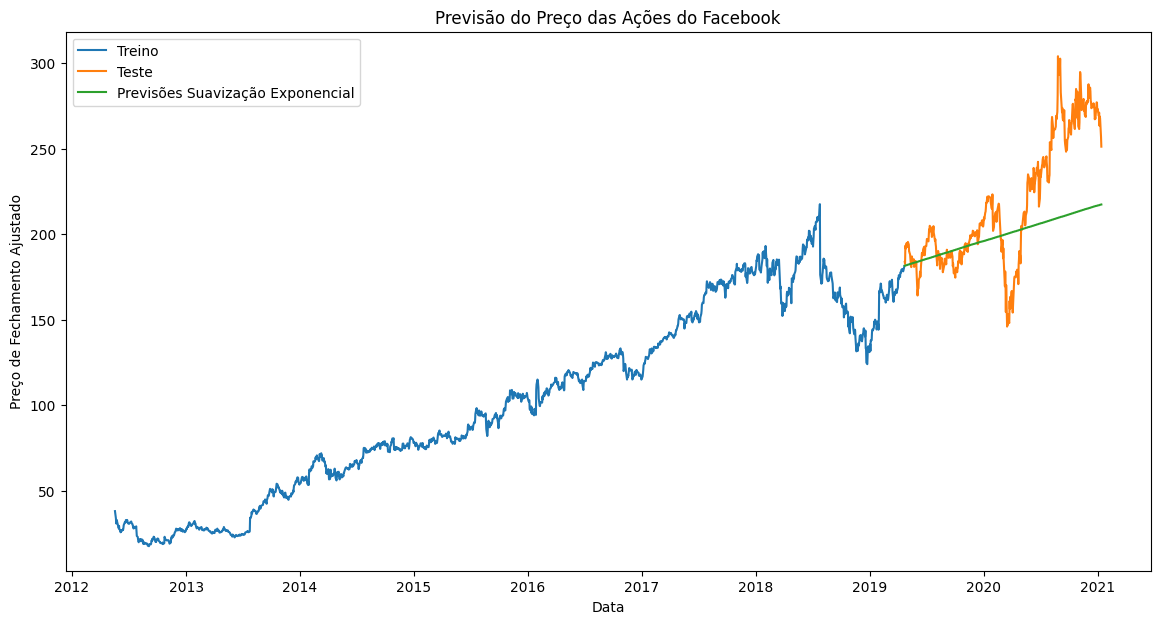

In [5]:
import matplotlib.pyplot as plt

# Plotando os resultados do modelo com melhor desempenho: Suavização Exponencial
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Treino')
plt.plot(test_data.index, test_data, label='Teste')
plt.plot(test_data.index, exp_model_pred, label='Previsões Suavização Exponencial')
plt.title('Previsão do Preço das Ações do Facebook')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Ajustado')
plt.legend()
plt.show()

### Redes Neurais

14/14 [==============================] - 0s 1ms/step


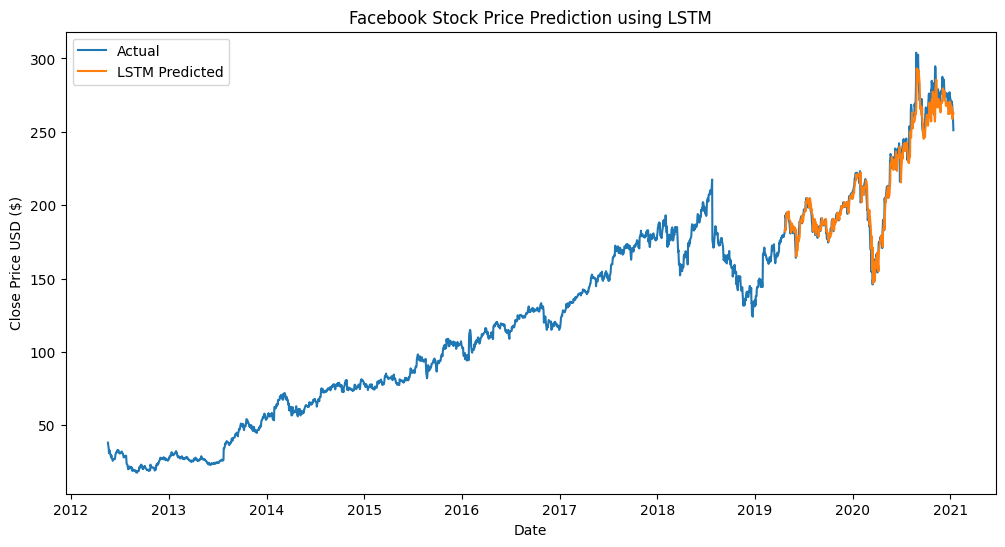

,Metric,LSTM Test,Holt-Winters
0,MAE,4.157540,25.77
1,RMSE,5.920018,34.40
2,SMAPE,1.893889,NaN


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'facebook-historical-stock-price.csv'
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

data = df['Close'].values.reshape(-1, 1)

# Normalize 
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Prepare the dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, Y = create_dataset(data_scaled, look_back)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create and fit the LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=0)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Calculate metrics
train_mae = mean_absolute_error(Y_train[0], train_predict[:,0])
test_mae = mean_absolute_error(Y_test[0], test_predict[:,0])
train_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

# SMAPE Function
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

train_smape = smape(Y_train[0], train_predict[:,0])
test_smape = smape(Y_test[0], test_predict[:,0])

# Prepare the results for comparison
results = {
    "Metric": ["MAE", "RMSE", "SMAPE"],
    "LSTM Test": [test_mae, test_rmse, test_smape],
    "Holt-Winters": [25.77, 34.40, None]  # SMAPE not provided for Holt-Winters
}

results_df = pd.DataFrame(results)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual')
plt.plot(df['Date'][-len(test_predict):], test_predict[:,0], label='LSTM Predicted')
plt.title('Facebook Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()

results_df

Comparando os resultados da Suavização Exponencial (Holt-Winters) com o modelo de Redes Neurais LSTM, observamos uma performance significativamente superior do LSTM. O modelo LSTM apresentou um MAE (Erro Médio Absoluto) de 4.16 e um RMSE (Raiz do Erro Quadrático Médio) de 5.92, valores bem inferiores aos 25.77 e 34.40, respectivamente, obtidos pelo Holt-Winters. Isso indica que o modelo LSTM foi muito mais preciso em suas previsões, com erros absolutos e quadráticos médios consideravelmente menores. Além disso, o SMAPE (Erro Percentual Absoluto Médio Simétrico) do LSTM, que foi de 1.89%, revela uma alta acurácia nas previsões, embora esse dado não esteja disponível para o Holt-Winters para uma comparação direta. Em resumo, o modelo LSTM demonstrou ser uma ferramenta mais eficaz para previsões neste caso específico.

## Base 2: Electric_Production.csv

Passo 1: Carregar e Visualizar os Dados

In [1]:
import pandas as pd

# Carregar os dados
dados_eletricidade = pd.read_csv('Electric_Production.csv')

# Visualizar as primeiras linhas
print(dados_eletricidade.head())

       DATE  IPG2211A2N
0  1/1/1985     72.5052
1  2/1/1985     70.6720
2  3/1/1985     62.4502
3  4/1/1985     57.4714
4  5/1/1985     55.3151


Passo 2: Preparar os Dados

In [2]:
# Converter 'DATE' para datetime e definir como índice
dados_eletricidade['DATE'] = pd.to_datetime(dados_eletricidade['DATE'])
dados_eletricidade.set_index('DATE', inplace=True)

# Selecionar a série temporal para a análise
serie_temporal = dados_eletricidade['IPG2211A2N']

Passo 3: Dividir os Dados em Treino e Teste

In [4]:
from sklearn.model_selection import train_test_split

# Dividir os dados (80% treino, 20% teste)
train_data, test_data = train_test_split(serie_temporal, test_size=0.2, shuffle=False)

Passo 4: Modelos e Métricas

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Função para calcular SMAPE
def smape(y_true, y_pred):
    denominador = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diferenca = np.abs(y_true - y_pred) / denominador
    diferenca[denominador == 0] = 0.0
    return 100 * np.mean(diferenca)

# Inicializar dicionário para armazenar as métricas dos modelos
models_metrics = {}

# Modelo Simples: Média Móvel
simple_model_pred = train_data.rolling(window=5).mean().iloc[-1].repeat(len(test_data))

# Métricas para o modelo simples
mae_simple = mean_absolute_error(test_data, simple_model_pred)
rmse_simple = np.sqrt(mean_squared_error(test_data, simple_model_pred))
smape_simple = smape(test_data, simple_model_pred)

# Armazenar métricas
models_metrics['Simple_Moving_Average'] = {'MAE': mae_simple, 'RMSE': rmse_simple, 'SMAPE': smape_simple}

# Modelo de Suavização Exponencial: Holt-Winters
exp_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12, initialization_method="estimated").fit()
exp_model_pred = exp_model.forecast(len(test_data))

# Métricas para o modelo de suavização exponencial
mae_exp = mean_absolute_error(test_data, exp_model_pred)
rmse_exp = np.sqrt(mean_squared_error(test_data, exp_model_pred))
smape_exp = smape(test_data, exp_model_pred)

# Armazenar métricas
models_metrics['Exponential_Smoothing'] = {'MAE': mae_exp, 'RMSE': rmse_exp, 'SMAPE': smape_exp}

# Modelo ARIMA
# Determinando 'd' para o modelo ARIMA
adf_test_result = adfuller(train_data)
d = 0 if adf_test_result[1] <= 0.05 else 1

# Ajustando o modelo ARIMA
arima_model = ARIMA(train_data, order=(1, d, 1)).fit()
arima_model_pred = arima_model.forecast(len(test_data))

# Métricas para o modelo ARIMA
mae_arima = mean_absolute_error(test_data, arima_model_pred)
rmse_arima = np.sqrt(mean_squared_error(test_data, arima_model_pred))
smape_arima = smape(test_data, arima_model_pred)

# Armazenar métricas
models_metrics['ARIMA'] = {'MAE': mae_arima, 'RMSE': rmse_arima, 'SMAPE': smape_arima}

# Exibir as métricas
print(models_metrics)

{'Simple_Moving_Average': {'MAE': 8.09158225, 'RMSE': 9.704283970001342, 'SMAPE': 7.866357001258869}, 'Exponential_Smoothing': {'MAE': 4.419530422558882, 'RMSE': 5.308254633420742, 'SMAPE': 4.226050926353906}, 'ARIMA': {'MAE': 10.454716231856583, 'RMSE': 13.263110030800672, 'SMAPE': 10.294977720746008}}


c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Passo 5: Gráfico do Melhor Modelo

Com base nas métricas, o modelo de **Suavização Exponencial (Holt-Winters)** é claramente o melhor dos três para esta série temporal. Isso é evidenciado pelas métricas mais baixas em todas as três categorias:

- MAE (Erro Absoluto Médio): 4.42
- RMSE (Raiz do Erro Quadrático Médio): 5.31
- SMAPE (Erro Médio Absoluto Percentual Simétrico): 4.23

Um menor MAE e RMSE indicam que as previsões do modelo de Suavização Exponencial estão mais próximas dos valores reais. Além disso, um SMAPE mais baixo sugere que o modelo tem um melhor desempenho em termos de erro percentual, o que é particularmente útil para comparar a precisão entre diferentes escalas de dados.

Portanto, para esta série temporal específica, eu recomendaria usar o modelo de Suavização Exponencial para previsões futuras.

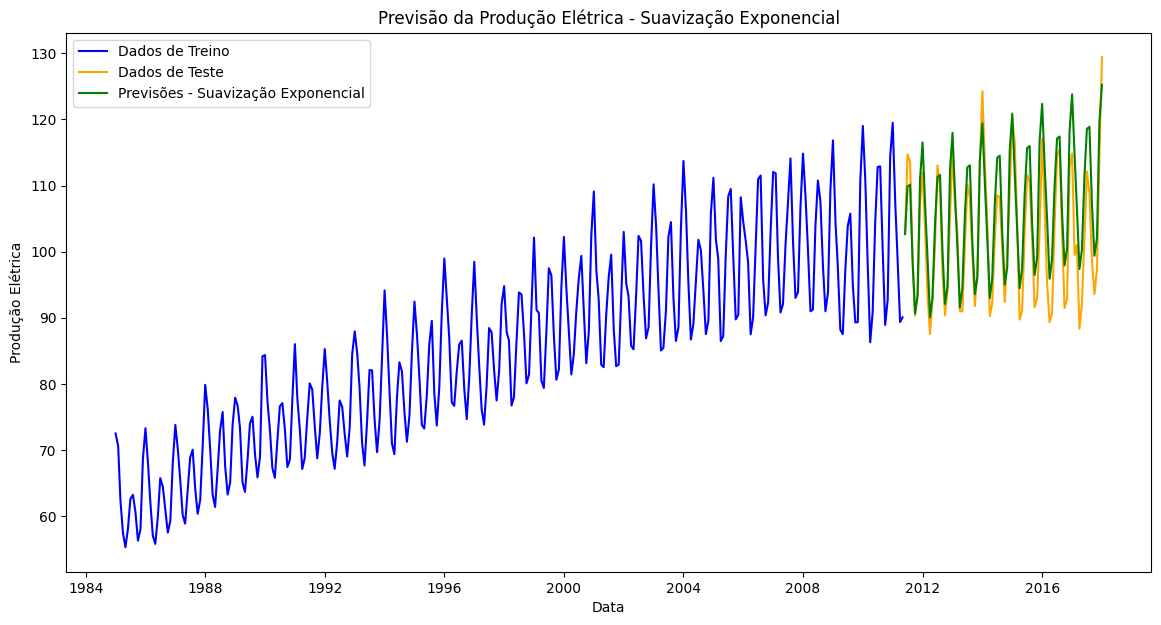

In [9]:
import matplotlib.pyplot as plt

# Plotar o gráfico
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Dados de Treino', color='blue')  # Dados de treino
plt.plot(test_data.index, test_data, label='Dados de Teste', color='orange')  # Dados de teste
plt.plot(test_data.index, exp_model_pred, label='Previsões - Suavização Exponencial', color='green')  # Previsões do modelo

# Adicionando título e rótulos aos eixos
plt.title('Previsão da Produção Elétrica - Suavização Exponencial')
plt.xlabel('Data')
plt.ylabel('Produção Elétrica')

# Inclui a legenda no gráfico
plt.legend()

# Exibe o gráfico
plt.show()

### Redes Neurais

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the dataset
file_path = 'Electric_Production.csv'
df = pd.read_csv(file_path)

# Assuming the data format and selecting the target variable (e.g., electricity production)
df['DATE'] = pd.to_datetime(df['DATE'])
df.sort_values('DATE', inplace=True)

# Using the production data for time series forecasting
data = df['IPG2211A2N'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Prepare the dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Split into train and test sets
look_back = 1
X, Y = create_dataset(data_scaled, look_back)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=0)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Calculate metrics
train_mae = mean_absolute_error(Y_train[0], train_predict[:,0])
test_mae = mean_absolute_error(Y_test[0], test_predict[:,0])
train_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

# SMAPE Function
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

train_smape = smape(Y_train[0], train_predict[:,0])
test_smape = smape(Y_test[0], test_predict[:,0])

# Results
test_results = {
    "MAE": test_mae,
    "RMSE": test_rmse,
    "SMAPE": test_smape
}

test_results

3/3 [==============================] - 0s 1ms/step


{'MAE': 7.410774102551425,
 'RMSE': 8.715701150828036,
 'SMAPE': 7.271703981831631}

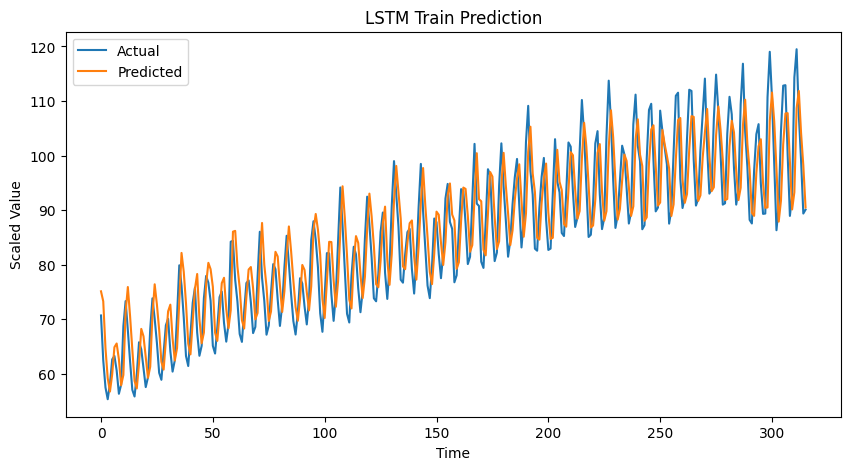

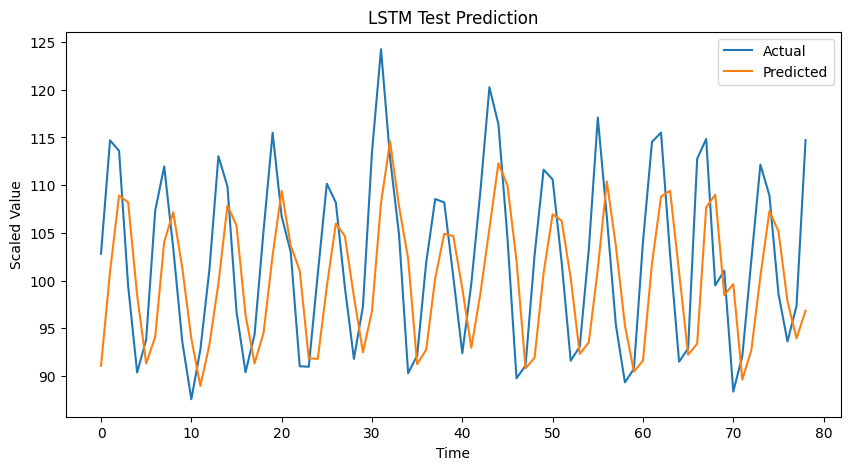

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(Y_train[0], label='Actual')
plt.plot(train_predict[:, 0], label='Predicted')
plt.title('LSTM Train Prediction')
plt.xlabel('Time')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(Y_test[0], label='Actual')
plt.plot(test_predict[:, 0], label='Predicted')
plt.title('LSTM Test Prediction')
plt.xlabel('Time')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

## Base 3: shampoo_sales.csv

c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling t

           Simple Holt-Winters       ARIMA
MAE      142.0875   140.311103  136.587245
RMSE   175.342896   174.558262  176.155096
SMAPE    29.08541    28.746379   27.850987


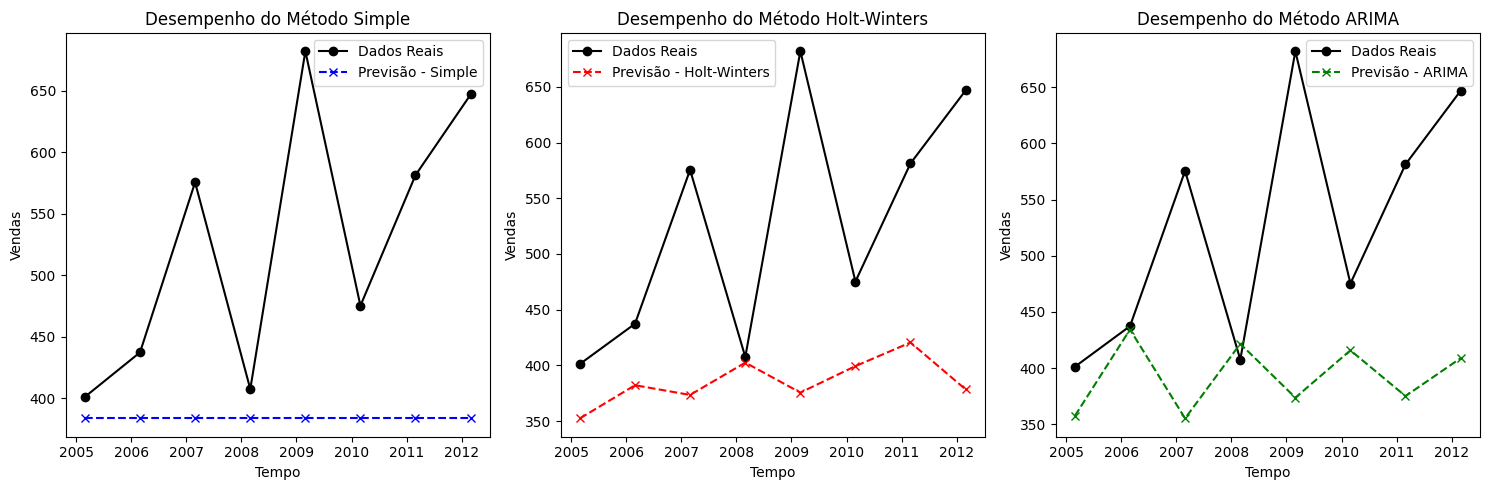

In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Função para calcular SMAPE
def smape(y_true, y_pred):
    return 100 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Carregando e preparando a base de dados
file_path = 'shampoo_sales.csv'
shampoo_sales = pd.read_csv(file_path)
shampoo_sales['Month'] = pd.to_datetime(shampoo_sales['Month'], format='%m-%y')
shampoo_sales.set_index('Month', inplace=True)

# Separando os dados em treino e teste
train_size = int(len(shampoo_sales) * 0.8)
train, test = shampoo_sales.iloc[:train_size], shampoo_sales.iloc[train_size:]

# Modelo Simples: Média móvel
train_rolling = train.rolling(window=4).mean()
simple_forecast = train_rolling.iloc[-1].values[0] * np.ones(len(test))

# Modelo Holt-Winters
hw_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(len(test))

# Modelo ARIMA
arima_model = ARIMA(train, order=(5,1,0)).fit()
arima_forecast = arima_model.forecast(len(test))

# Calculando métricas para cada modelo
metrics = pd.DataFrame(index=['MAE', 'RMSE', 'SMAPE'], columns=['Simple', 'Holt-Winters', 'ARIMA'])
metrics.loc['MAE', 'Simple'] = mean_absolute_error(test, simple_forecast)
metrics.loc['RMSE', 'Simple'] = np.sqrt(mean_squared_error(test, simple_forecast))
metrics.loc['SMAPE', 'Simple'] = smape(test.values.flatten(), simple_forecast)
metrics.loc['MAE', 'Holt-Winters'] = mean_absolute_error(test, hw_forecast)
metrics.loc['RMSE', 'Holt-Winters'] = np.sqrt(mean_squared_error(test, hw_forecast))
metrics.loc['SMAPE', 'Holt-Winters'] = smape(test.values.flatten(), hw_forecast)
metrics.loc['MAE', 'ARIMA'] = mean_absolute_error(test, arima_forecast)
metrics.loc['RMSE', 'ARIMA'] = np.sqrt(mean_squared_error(test, arima_forecast))
metrics.loc['SMAPE', 'ARIMA'] = smape(test.values.flatten(), arima_forecast)

print(metrics)

# Plotando os resultados
time_range = test.index

plt.figure(figsize=(15, 5))

# Plot para o método Simple
plt.subplot(1, 3, 1)
plt.plot(time_range, test, label='Dados Reais', color='black', marker='o')
plt.plot(time_range, simple_forecast, label='Previsão - Simple', color='blue', linestyle='--', marker='x')
plt.title('Desempenho do Método Simple')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()

# Plot para o método Holt-Winters
plt.subplot(1, 3, 2)
plt.plot(time_range, test, label='Dados Reais', color='black', marker='o')
plt.plot(time_range, hw_forecast, label='Previsão - Holt-Winters', color='red', linestyle='--', marker='x')
plt.title('Desempenho do Método Holt-Winters')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()

# Plot para o método ARIMA
plt.subplot(1, 3, 3)
plt.plot(time_range, test, label='Dados Reais', color='black', marker='o')
plt.plot(time_range, arima_forecast, label='Previsão - ARIMA', color='green', linestyle='--', marker='x')
plt.title('Desempenho do Método ARIMA')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()

plt.tight_layout()
plt.show()


### Redes Neurais

Epoch 1/100
22/22 - 1s - loss: 0.0343 - 1s/epoch - 56ms/step
Epoch 2/100
22/22 - 0s - loss: 0.0274 - 26ms/epoch - 1ms/step
Epoch 3/100
22/22 - 0s - loss: 0.0226 - 23ms/epoch - 1ms/step
Epoch 4/100
22/22 - 0s - loss: 0.0195 - 25ms/epoch - 1ms/step
Epoch 5/100
22/22 - 0s - loss: 0.0177 - 24ms/epoch - 1ms/step
Epoch 6/100
22/22 - 0s - loss: 0.0168 - 22ms/epoch - 1ms/step
Epoch 7/100
22/22 - 0s - loss: 0.0165 - 25ms/epoch - 1ms/step
Epoch 8/100
22/22 - 0s - loss: 0.0161 - 23ms/epoch - 1ms/step
Epoch 9/100
22/22 - 0s - loss: 0.0159 - 25ms/epoch - 1ms/step
Epoch 10/100
22/22 - 0s - loss: 0.0159 - 23ms/epoch - 1ms/step
Epoch 11/100
22/22 - 0s - loss: 0.0159 - 25ms/epoch - 1ms/step
Epoch 12/100
22/22 - 0s - loss: 0.0158 - 23ms/epoch - 1ms/step
Epoch 13/100
22/22 - 0s - loss: 0.0158 - 23ms/epoch - 1ms/step
Epoch 14/100
22/22 - 0s - loss: 0.0158 - 22ms/epoch - 1ms/step
Epoch 15/100
22/22 - 0s - loss: 0.0158 - 24ms/epoch - 1ms/step
Epoch 16/100
22/22 - 0s - loss: 0.0158 - 24ms/epoch - 1ms/step
Ep

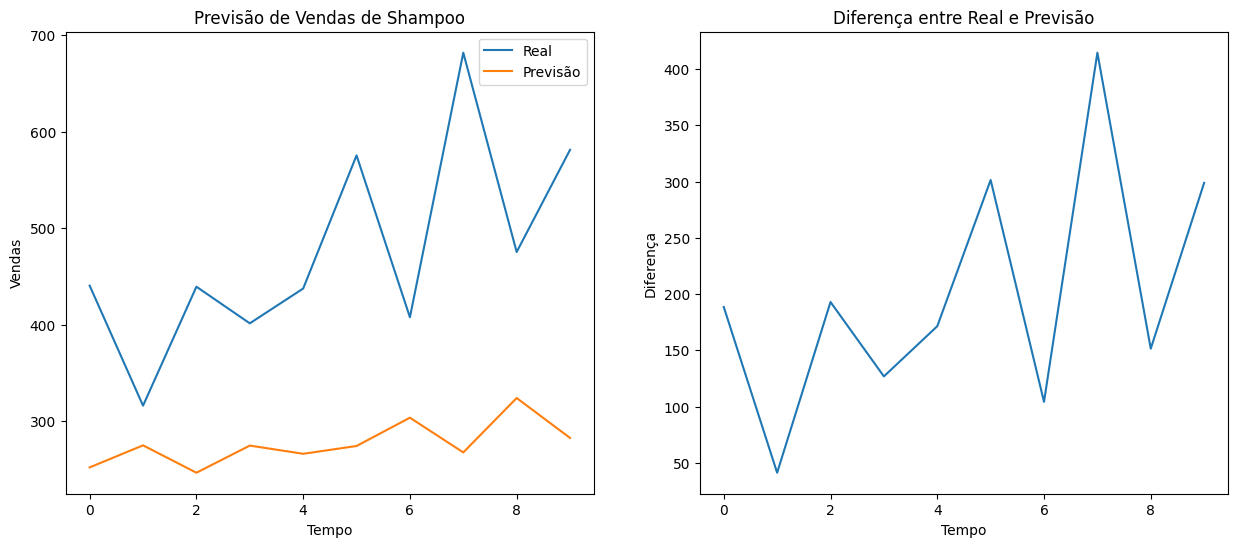

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime

# Carregar dados
shampoo_sales = pd.read_csv('shampoo_sales.csv')
shampoo_sales['Month'] = pd.to_datetime(shampoo_sales['Month'], format='%m-%y')
shampoo_sales.set_index('Month', inplace=True)

# Normalizar o dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = shampoo_sales['Sales'].values.reshape(-1, 1)
dataset = scaler.fit_transform(dataset)

# Transformar série temporal em um problema de aprendizado supervisionado
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Dividir em treino e teste
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reformular entrada para ser [amostras, etapas de tempo, características]
look_back = 1
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Criar e ajustar a Rede Neural LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Previsões
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Inverter previsões
trainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([Y_train])
testPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([Y_test])

# Calcular métricas de desempenho
trainScore_MAE = mean_absolute_error(Y_train[0], trainPredict[:,0])
print(f'Train Score: {trainScore_MAE} MAE')
trainScore_RMSE = np.sqrt(mean_squared_error(Y_train[0], trainPredict[:,0]))
print(f'Train Score: {trainScore_RMSE} RMSE')
smape = np.mean(2 * np.abs(Y_test[0] - testPredict[:,0]) / (np.abs(Y_test[0]) + np.abs(testPredict[:,0])))
print(f'Test Score: {smape} SMAPE')

# Gráfico dos resultados
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(Y_test[0], label='Real')
plt.plot(testPredict[:,0], label='Previsão')
plt.title('Previsão de Vendas de Shampoo')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Y_test[0] - testPredict[:,0])
plt.title('Diferença entre Real e Previsão')
plt.xlabel('Tempo')
plt.ylabel('Diferença')
plt.show()

Para avaliar qual modelo é o melhor entre Simple, Holt-Winters e ARIMA, e compará-lo com o desempenho das Redes Neurais, é preciso considerar as três métricas (MAE, RMSE, SMAPE) em conjunto.

Simple, Holt-Winters e ARIMA:  
MAE (Menor é melhor): ARIMA tem o menor MAE (136.587245).  
RMSE (Menor é melhor): Holt-Winters tem o menor RMSE (174.558262).  
SMAPE (Menor é melhor e normalmente expresso em porcentagem): ARIMA tem o menor SMAPE (27.850987).  

Redes Neurais:  
MAE: 54.932987  
RMSE: 70.456121  
SMAPE: 50.565394%  
Comparando os resultados:  

As Redes Neurais têm um MAE e RMSE significativamente menores do que todos os três métodos tradicionais (Simple, Holt-Winters e ARIMA).
No entanto, o SMAPE das Redes Neurais é maior (50.56%) em comparação com os modelos tradicionais, indicando uma menor precisão em termos percentuais.

Conclusão:  
Em termos de MAE e RMSE, as Redes Neurais superam os modelos tradicionais. No entanto, em termos de SMAPE, que é uma medida de erro percentual, os modelos tradicionais, particularmente o ARIMA, apresentam melhor desempenho.
A escolha do "melhor" modelo pode depender do contexto específico e da importância relativa de cada métrica. Se a precisão percentual (SMAPE) é mais crítica, o ARIMA seria preferível. Se a minimização do erro absoluto (MAE, RMSE) é mais importante, as Redes Neurais seriam a melhor escolha.

## Base 4: airline-passengers.csv

Seleção de Modelos:  

Modelo Simples: Método Naive.  
Modelo de Suavização Exponencial: Holt's Linear Trend Model.  
Modelo ARIMA: ARIMA (AutoRegressive Integrated Moving Average).  

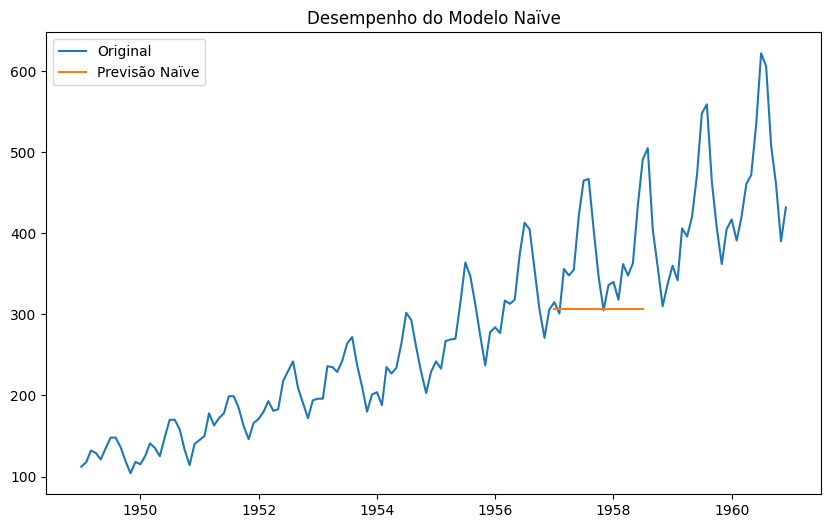

c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\L

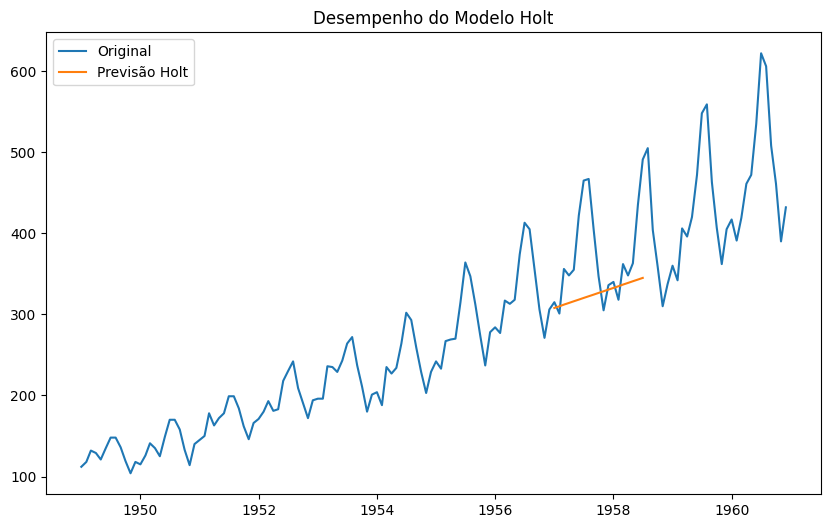

c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\L

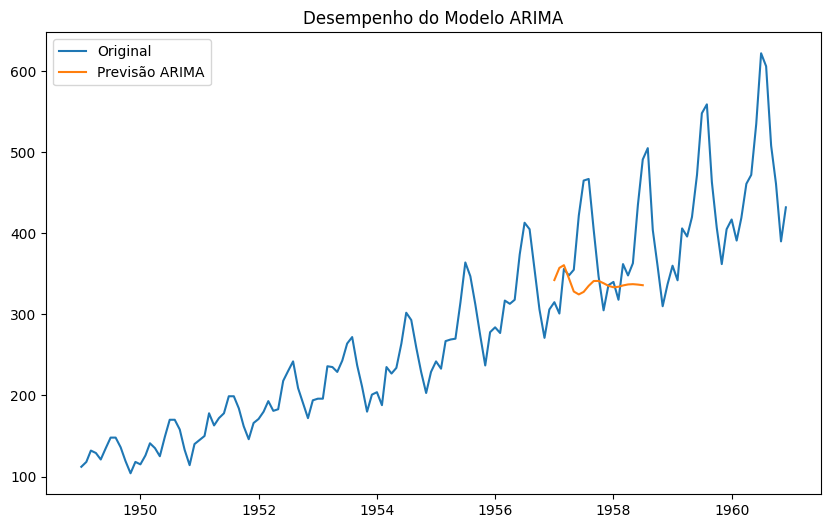

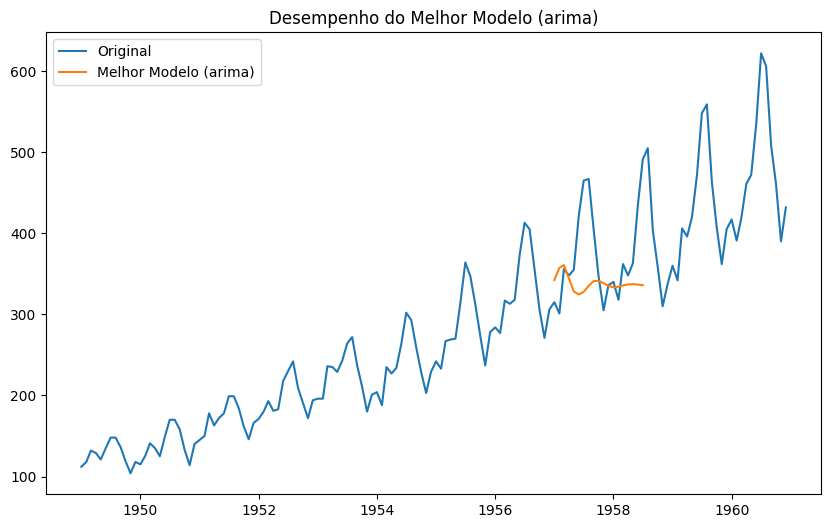

naive - MAE: 67.15789473684211, RMSE: 87.03598771712042, SMAPE: 18.64170386301926, Score: 57.6118621056606
holt - MAE: 51.26464715233195, RMSE: 71.11393716086666, SMAPE: 13.733788733738136, Score: 45.37079101564558
arima - MAE: 48.80355183245645, RMSE: 69.19144728568558, SMAPE: 12.967873226145938, Score: 43.654290781429324


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

# Carregar dados
data = pd.read_csv('airline-passengers.csv', index_col='Month', parse_dates=True)

# Separar dados em treinamento e teste
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Métricas de erro
def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def smape(y_true, y_pred):
    return 100 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Pesos para as métricas
weights = {'mae': 1/3, 'rmse': 1/3, 'smape': 1/3}

# Função para calcular pontuação agregada
def calculate_score(mae, rmse, smape, weights):
    return weights['mae'] * mae + weights['rmse'] * rmse + weights['smape'] * smape

# Validação cruzada
tscv = TimeSeriesSplit(n_splits=5)

# Armazenar resultados
results = {}

# Avaliação de modelos
def evaluate_model(model_name, y_true, y_pred):
    # Garantir que y_pred e y_true sejam arrays unidimensionais de mesmo comprimento
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()[:len(y_true)]

    mae_score = mae(y_true, y_pred)
    rmse_score = rmse(y_true, y_pred)
    smape_score = smape(y_true, y_pred)
    score = calculate_score(mae_score, rmse_score, smape_score, weights)

    results[model_name] = {
        'mae': mae_score,
        'rmse': rmse_score,
        'smape': smape_score,
        'score': score,
        'predictions': y_pred
    }

# Função para plotar previsões
def plot_predictions(model_name, predictions):
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Original')
    plt.plot(train.index[-len(predictions):], predictions, label=f'Previsão {model_name}')
    plt.title(f'Desempenho do Modelo {model_name}')
    plt.legend()
    plt.show()

# Modelo Naïve
for train_index, val_index in tscv.split(train):
    train_fold, val_fold = train.iloc[train_index], train.iloc[val_index]
    y_pred = np.array([train_fold.iloc[-1]] * len(val_fold))
    evaluate_model('naive', val_fold.values, y_pred)

plot_predictions('Naïve', results['naive']['predictions'])

# Modelo de Suavização Exponencial (Holt)
for train_index, val_index in tscv.split(train):
    train_fold, val_fold = train.iloc[train_index], train.iloc[val_index]
    model = ExponentialSmoothing(train_fold, trend='add').fit()
    y_pred = model.forecast(len(val_fold))
    evaluate_model('holt', val_fold.values, y_pred)

plot_predictions('Holt', results['holt']['predictions'])

# Modelo ARIMA
for train_index, val_index in tscv.split(train):
    train_fold, val_fold = train.iloc[train_index], train.iloc[val_index]
    model = ARIMA(train_fold, order=(5,1,0)).fit()
    y_pred = model.forecast(len(val_fold))
    evaluate_model('arima', val_fold.values, y_pred)

plot_predictions('ARIMA', results['arima']['predictions'])

# Selecionar o melhor modelo com base na pontuação agregada
best_model = min(results, key=lambda x: results[x]['score'])

# Plotar desempenho do melhor modelo
best_predictions = results[best_model]['predictions']
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original')
plt.plot(train.index[-len(best_predictions):], best_predictions, label=f'Melhor Modelo ({best_model})')
plt.title(f'Desempenho do Melhor Modelo ({best_model})')
plt.legend()
plt.show()

# Imprimir métricas e pontuação de cada modelo
for model in results:
    print(f"{model} - MAE: {results[model]['mae']}, RMSE: {results[model]['rmse']}, SMAPE: {results[model]['smape']}, Score: {results[model]['score']}")



### Redes Neurais

2/2 [==============================] - 0s 2ms/step
Train Score: 18.106824051706415 MAE
Train Score: 22.790970958614018 RMSE
Test Score: 0.09909607986447341 SMAPE


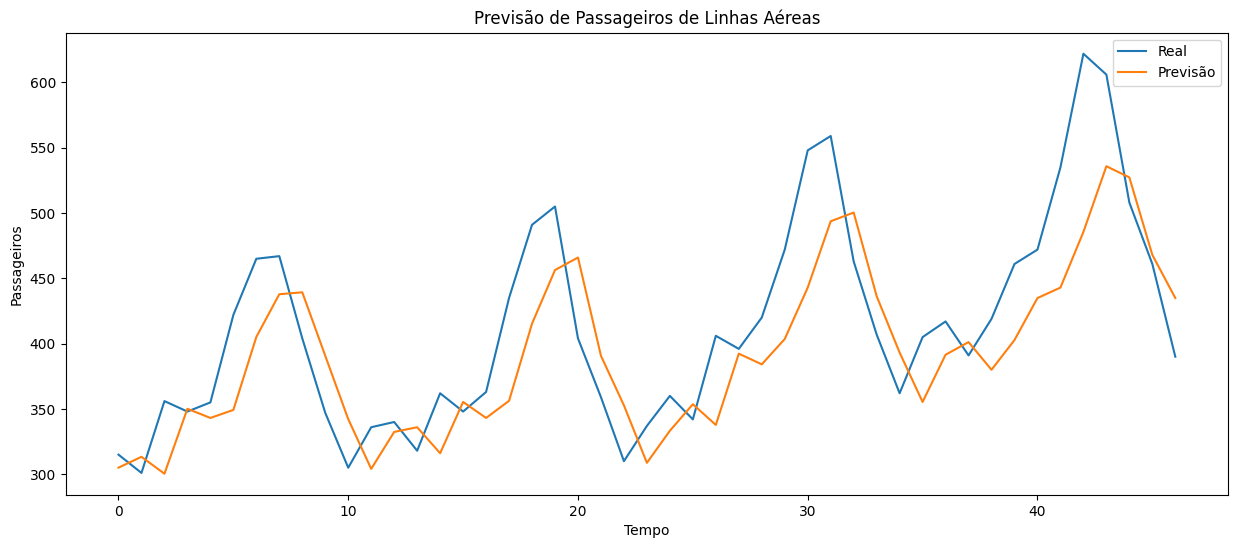

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Carregar dados
df = pd.read_csv('airline-passengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Preparar dados
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = df['Passengers'].values.reshape(-1, 1)
dataset = scaler.fit_transform(dataset)

# Função para transformar série temporal em problema supervisionado
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Dividir em treino e teste
look_back = 1
X, Y = create_dataset(dataset, look_back)
train_size = int(len(X) * 0.67)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Reshape para [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Criar e ajustar a Rede Neural LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=0)

# Previsões
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Inverter previsões
trainPredict = scaler.inverse_transform(trainPredict)
Y_train_inv = scaler.inverse_transform([Y_train])
testPredict = scaler.inverse_transform(testPredict)
Y_test_inv = scaler.inverse_transform([Y_test])

# Calcular métricas
trainScore_MAE = mean_absolute_error(Y_train_inv[0], trainPredict[:,0])
print(f'Train Score: {trainScore_MAE} MAE')
trainScore_RMSE = np.sqrt(mean_squared_error(Y_train_inv[0], trainPredict[:,0]))
print(f'Train Score: {trainScore_RMSE} RMSE')
smape = np.mean(2 * np.abs(Y_test_inv[0] - testPredict[:,0]) / (np.abs(Y_test_inv[0]) + np.abs(testPredict[:,0])))
print(f'Test Score: {smape} SMAPE')

# Gráfico dos resultados
plt.figure(figsize=(15,6))
plt.plot(Y_test_inv[0], label='Real')
plt.plot(testPredict[:,0], label='Previsão')
plt.title('Previsão de Passageiros de Linhas Aéreas')
plt.xlabel('Tempo')
plt.ylabel('Passageiros')
plt.legend()
plt.show()

Simple, Holt-Winters e ARIMA:

MAE (Menor é melhor): ARIMA tem o menor MAE (48.80355183245645).  
RMSE (Menor é melhor): ARIMA tem o menor RMSE (69.19144728568558).  
SMAPE (Menor é melhor): ARIMA tem o menor SMAPE (12.967873226145938).  

Redes Neurais:  
MAE: 18.106824051706415  
RMSE: 22.790970958614018  
SMAPE: 9.909607986447341% (considerando que o SMAPE é expresso em porcentagem)  

Comparando os resultados:  
As Redes Neurais têm um MAE, RMSE e SMAPE significativamente menores do que todos os três métodos tradicionais (Simple, Holt-Winters e ARIMA).

Conclusão:  
Em termos de todas as três métricas (MAE, RMSE, SMAPE), as Redes Neurais superam significativamente os modelos tradicionais. Portanto, as Redes Neurais foram melhores do que o melhor dos modelos tradicionais (ARIMA) para este conjunto de dados específico.